In [15]:
import os
import time

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
from image_registration import image_registration
from helpers import diff_image

In [3]:
df = pd.read_csv('data.csv', index_col=0)
df

,img_1,img_2,target
0,orig_1.png,fake_1.png,0
1,orig_2.png,fake_2.png,0
2,orig_3.png,fake_3.png,0
3,orig_4.png,fake_4.png,0
4,orig_5.png,fake_5.png,0
5,orig_5.png,orig_5_2.png,1
6,orig_6.png,fake_6.png,0
7,orig_6.png,orig_6_2.png,1
8,orig_7.png,fake_7.png,0
9,orig_7.png,orig_7_2.png,1


In [29]:
scores = []
for i in range(df.shape[0]):
    positive_path, negative_path, _ = df.iloc[i]
    print(positive_path, negative_path)
    
    positive = cv2.imread('data/marks/' + positive_path)
    negative = cv2.imread('data/marks/' + negative_path)

    crop_1, crop_2 = image_registration(positive, negative)
    diff, score = diff_image(crop_1, crop_2)
    scores.append(score)
df['score'] = scores

orig_1.png fake_1.png
orig_2.png fake_2.png
orig_3.png fake_3.png
orig_4.png fake_4.png
orig_5.png fake_5.png
orig_5.png orig_5_2.png
orig_6.png fake_6.png
orig_6.png orig_6_2.png
orig_7.png fake_7.png
orig_7.png orig_7_2.png
orig_8.png fake_8.png
orig_9.png fake_9.png
orig_9.png orig_9_2.png


In [37]:
df

,img_1,img_2,target,score
0,orig_1.png,fake_1.png,0,0.680426
1,orig_2.png,fake_2.png,0,0.660493
2,orig_3.png,fake_3.png,0,0.692668
3,orig_4.png,fake_4.png,0,0.660567
4,orig_5.png,fake_5.png,0,0.488491
5,orig_5.png,orig_5_2.png,1,0.707378
6,orig_6.png,fake_6.png,0,0.589178
7,orig_6.png,orig_6_2.png,1,0.686765
8,orig_7.png,fake_7.png,0,0.548514
9,orig_7.png,orig_7_2.png,1,0.672308


In [46]:
df[df.target == 0].score.min(), df[df.target == 0].score.max()

(0.45794940108957694, 0.6926680104157521)

In [47]:
df[df.target == 1].score.min(), df[df.target == 1].score.max()

(0.6692263334982715, 0.7073778521114078)

<AxesSubplot:xlabel='target', ylabel='score'>

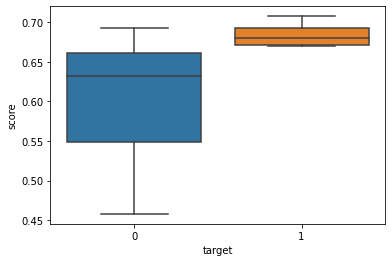

In [48]:
sns.boxplot(data=df, y='score', x='target')

In [51]:
scores > [0.68]

True

In [ ]:
# возьмем порог по точности 0.68

### Подбор параметров

In [4]:
parametrs = {
    'ORB_points': [5000, 10000, 15000],
    'DIFF_THR': [100, 120, 150],
}

grid_search = pd.DataFrame([], columns=['ORB_points', 'H_MATCH_COUNT', 'H_DIST', 'time', 'accuracy'])

In [5]:
# возьмем порог по точности 0.68
THR = 0.68

In [13]:
res = pd.DataFrame([], columns= ['orb', 'd', 'time', 'acc'])

In [16]:

for orb in parametrs['ORB_points']:
    for d in parametrs['DIFF_THR']:
        scores = []
        times = []

        for i in range(df.shape[0]):

            positive_path, negative_path = df[['img_1', 'img_2']].iloc[i]
            print(positive_path, negative_path)

            positive = cv2.imread('data/marks/' + positive_path)
            negative = cv2.imread('data/marks/' + negative_path)
            
            start = time.time()
            crop_1, crop_2 = image_registration(positive, negative)
            diff, score = diff_image(crop_1, crop_2, d)
            end = time.time()
            times.append(end - start)
            scores.append(score > THR) 

        r = {
            'orb': orb,
            'd': d,
            'time': np.mean(times),
            'acc': accuracy_score(df.target, scores)
        }
        res = res.append(r, ignore_index=True)
                    
                    
        

orig_1.png fake_1.png
orig_2.png fake_2.png
orig_3.png fake_3.png
orig_4.png fake_4.png
orig_5.png fake_5.png
orig_5.png orig_5_2.png
orig_6.png fake_6.png
orig_6.png orig_6_2.png
orig_7.png fake_7.png
orig_7.png orig_7_2.png
orig_8.png fake_8.png
orig_9.png fake_9.png
orig_9.png orig_9_2.png
orig_1.png fake_1.png
orig_2.png fake_2.png
orig_3.png fake_3.png
orig_4.png fake_4.png
orig_5.png fake_5.png
orig_5.png orig_5_2.png
orig_6.png fake_6.png
orig_6.png orig_6_2.png
orig_7.png fake_7.png
orig_7.png orig_7_2.png
orig_8.png fake_8.png
orig_9.png fake_9.png
orig_9.png orig_9_2.png
orig_1.png fake_1.png
orig_2.png fake_2.png
orig_3.png fake_3.png
orig_4.png fake_4.png
orig_5.png fake_5.png
orig_5.png orig_5_2.png
orig_6.png fake_6.png
orig_6.png orig_6_2.png
orig_7.png fake_7.png
orig_7.png orig_7_2.png
orig_8.png fake_8.png
orig_9.png fake_9.png
orig_9.png orig_9_2.png
orig_1.png fake_1.png
orig_2.png fake_2.png
orig_3.png fake_3.png
orig_4.png fake_4.png
orig_5.png fake_5.png
orig_5.p

In [22]:
res

,orb,d,time,acc
0,5000.0,100.0,6.581898,0.692308
1,5000.0,120.0,6.578943,0.554500
2,5000.0,150.0,6.703648,0.883400
3,10000.0,100.0,10.381183,0.459200
4,10000.0,120.0,7.890245,0.872430
5,10000.0,150.0,7.223585,0.879500
6,15000.0,100.0,6.800592,0.678900
7,15000.0,120.0,6.843774,0.762900
8,15000.0,150.0,7.037416,0.673400


Максимальная тчоность достигается при orb=10000, d=150, время на обработку 2х изображений и их сранвение (1 иетрация) = 7.22 сек

<AxesSubplot:xlabel='time', ylabel='acc'>

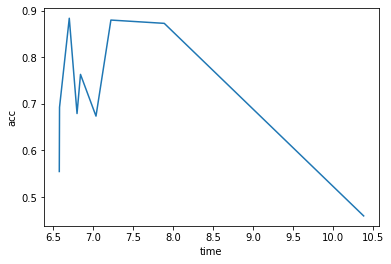

In [21]:
sns.lineplot(data=res, x='time', y='acc')